In [1]:
import pandas as pd  #pandas用于数据清洗
import numpy as np  #numpy用于矩阵运算
import matplotlib.pyplot as plt  #matplotlib用于作图，分析数据
import seaborn as sns  #seaborn用于高级作图，数据可视化
import re  #python中的正则表达式包
import patsy
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib.font_manager import FontProperties  #用于为matplotlib设置中文字体

In [12]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

#expances_data = pd.read_csv('ml_data_cleaned')
expances_data = pd.read_csv('ml_data_final')
expances_data = expances_data.drop('userid', axis=1)
expances_data.loc[:, '年龄段'] = expances_data['年龄段'].astype(int)

In [13]:
#使用透视图或分组分析多个变量之间的关系
#expances_data.pivot_table('近1年消费总笔数', '消费城市数量', '年龄段',  aggfunc='mean')

In [15]:
#f = '中间报价 ~ 性别 + 年龄段 + 借记卡数 + 贷记卡数 + 近1年单笔交易金额最大值 + 近1年消费总笔数 + 近1年消费总金额 + 消费城市数量'、
f = '最低报价 ~ 性别 + 年龄段 + 近1年月累计交易金额最大值 + 消费城市数量'
#f = '中间报价 ~ 近1年消费总金额'
y, X = patsy.dmatrices(f, expances_data, return_type='dataframe')

results = sm.OLS(y, X).fit()
#print(results.summary())

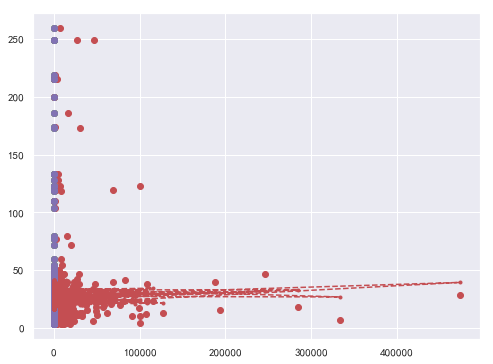

In [16]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o', label='data')
ax.plot(X, y_fitted, 'r--.',label='OLS')

In [18]:
#sm.graphics.plot_partregress('中间报价', '近1年消费总金额', ['性别', '年龄段'], data=expances_data, obs_labels=False)

expances = pd.read_csv('ml_data_cleaned')
expances = expances.drop('userid', axis=1)
expances.loc[:, '年龄段'] = expances['年龄段'].astype(int)
expances = expances.drop('近1年单笔交易金额最大值', axis=1)

f = '中间报价 ~ 性别 + 年龄段 + 借记卡数 + 贷记卡数 + 近1年消费总笔数 + 近1年消费总金额 + 消费城市数量'
#f = '中间报价 ~ 性别'
y, X = patsy.dmatrices(f, expances, return_type='dataframe')

results = sm.OLS(y, X).fit()
print(results.summary())

In [9]:
#sm.graphics.plot_partregress('中间报价', '近1年消费总金额', ['性别', '年龄段'], data=expances, obs_labels=False)

In [24]:
expances = expances_data

In [25]:
X = expances.iloc[:, 1:].values
y = expances.iloc[:, 0].values

m = X.shape[0]  #数据集大小
X_train, y_train = X[:m  // 4 * 3], y[:m // 4 * 3]
X_test, y_test = X[m  // 4 * 3 :] , y[m // 4 * 3 :]

In [64]:
alpha = 30
reg_lasso = linear_model.Lasso(alpha=alpha, fit_intercept=True, normalize=True, max_iter=20000)
y_pred_lasso = reg_lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(reg_lasso)
print('r^2 score on test data: %f' % r2_score_lasso)

Lasso(alpha=30, copy_X=True, fit_intercept=True, max_iter=20000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 score on test data: -0.010052


In [28]:
#expances

In [34]:
y_pred = reg_lasso.predict(X_train)

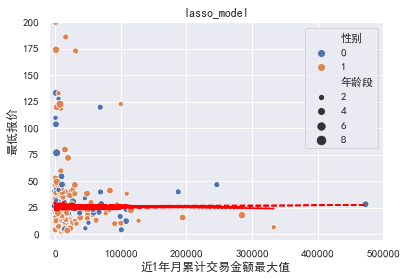

In [65]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

sns.scatterplot(x='近1年月累计交易金额最大值', y='最低报价', hue='性别', size='年龄段', data=expances);
#sns.set(rc={'figure.figsize':(50,8.27)})
#plt.axis([-20, 25000, -5, 200])
plt.axis([-10000, 500000, -5, 200])
#plt.plot(X_train, y_pr_pred, color='green', label='quadratic fit')
plt.plot(X_train, y_pred, color='red', label='lasso', linestyle='--')
plt.title('lasso_model')
plt.savefig('figures/sex_age_lasso')
#plt.legend(loc='best')
plt.show()

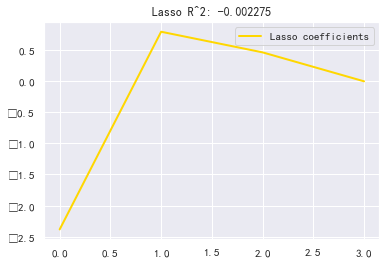

In [57]:
plt.plot(reg_lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f" % r2_score_lasso)
plt.savefig('figures/test_lasso')
plt.show()

In [47]:
v = [[0,5.0,1,1,4,10990.61,1]]
#reg_lasso.predict(v)

In [48]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7, normalize=True, max_iter=1000)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.008659


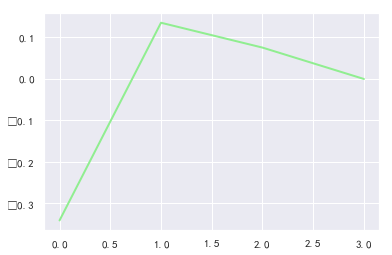

In [49]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.show()

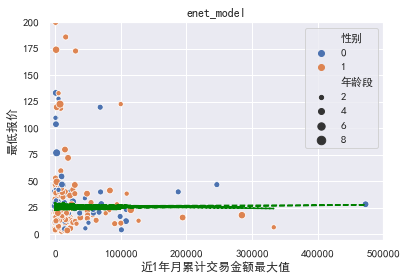

In [55]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

sns.scatterplot(x='近1年月累计交易金额最大值', y='最低报价', hue='性别', size='年龄段', data=expances);
#sns.set(rc={'figure.figsize':(50,8.27)})
#plt.axis([-20, 25000, -5, 200])
plt.axis([-10000, 500000, -5, 200])
#plt.plot(X_train, y_pr_pred, color='green', label='quadratic fit')
plt.plot(X_train, y_pred, color='green', label='enet', linestyle='--')
plt.title('enet_model')
plt.savefig('figures/sex_age_enet')
#plt.legend(loc='best')

plt.show()

In [16]:
v = [[0,5.0,1,1,4,10990.61,1]]
enet.predict(v)

array([28.48545894])

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

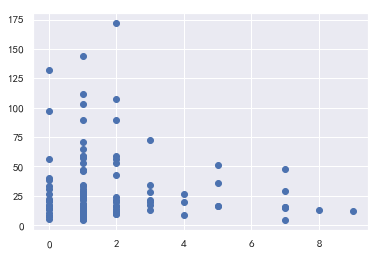

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    #('std_scaler', StandardScaler()),
    ('linear', linear_model.Lasso(alpha=alpha, fit_intercept=True, normalize=True))
])

model = model.fit(X_train, y_train)


y_predict = model.predict(X_test)
plt.scatter(X_test[:, 3], y_test)
model

#print(X_test)

In [18]:
import pickle

with open('lasso_model.pickle', 'wb') as fw:
    pickle.dump(reg_lasso, fw)

In [19]:
#X_train.tolist()